## Name: Jyosna Philip
## Roll No: 23122019
## Date: 07/03/2024

In [92]:
import pandas as pd   #importing required libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [93]:
df=pd.read_csv("dataTree1.csv")
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


2.Upload from a text file where seperator is tab

In [94]:

#***creating a text file where  separator is tab

with open("dataTree1.csv",'r') as file:
    with open('dataTreeClassifier.txt','a') as tsv_file:
        for line in file:
            new_line=line.replace(',','\t')
            tsv_file.write(new_line)
with open('dataTreeClassifier.txt','r') as tsv_file:
    line=tsv_file.readline()
    print(line)  
# uploading text file
df_txt=pd.read_table('dataTreeClassifier.txt',sep='\t')
df_txt.head()

ï»¿Age	Experience	Rank	Nationality	Go



,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [95]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1


In [96]:
features = ['Age', 'Experience', 'Rank', 'Nationality']
print("Features")
X = df[features]
print(X)
print("Dependent")
Y = df['Go']
print(Y)

Features
    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
Dependent
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


3. Uploading from excel

In [97]:
#uploading from excel
exl_df=pd.read_excel("dummy_data.xlsx")
exl_df.head()

,Month,Birthday
0,January,True
1,February,False
2,March,True
3,April,False
4,May,True


4. Exploring map function

In [98]:
#passing a fn through map
def sum(x):
    x+=5
    return x
numbers=[2,4,7,8]
l=map(sum,numbers)
print(l) #retrns position?
print(list(l))

[7, 9, 12, 13]


In [99]:
#modifying strings
st=['jyosna','philip']
#l=map(st,list)  #gives error, 2nd parameter should be iterable
l=map(list,st)
print(l)
print(list(l))

[['j', 'y', 'o', 's', 'n', 'a'], ['p', 'h', 'i', 'l', 'i', 'p']]


5. Create a map function to convert a month column to Numbers Jan-1, Feb-2 and so on

In [100]:
exl_df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [101]:
month_map={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
exl_df["Month"]=exl_df['Month'].map(month_map)
exl_df.head()

,Month,Birthday
0,1,True
1,2,False
2,3,True
3,4,False
4,5,True


6. Create a map function to convert True to 1 and False to Zero

In [102]:
exl_df["Birthday"].unique()

array([ True, False])

In [103]:
tf_map={True:1,False:0}
exl_df["Birthday"]=exl_df["Birthday"].map(tf_map)
exl_df.head()

,Month,Birthday
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1


[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

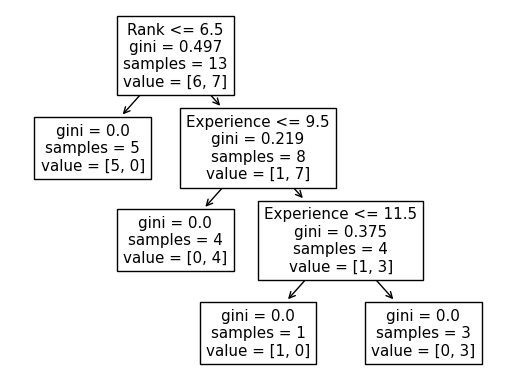

In [104]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)

In [105]:
print(dtree.predict([[47, 12, 4, 0]]))

[0]


C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [106]:
print(dtree.predict([[20, 10, 10, 1]]))

[0]


C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


9. Change Gini to Entropy anc check calculation

[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

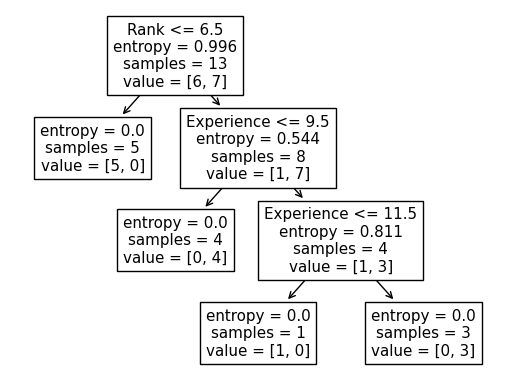

In [107]:
#how dtree looks like if criterion is entropy and splitter is best
dtree = DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)

[Text(0.625, 0.9285714285714286, 'Rank <= 5.878\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.5, 0.7857142857142857, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.7857142857142857, 'Experience <= 18.137\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.625, 0.6428571428571429, 'Age <= 40.264\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5, 0.5, 'Nationality <= 0.422\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.35714285714285715, 'Rank <= 7.944\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.21428571428571427, 'Age <= 35.313\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.35714285714285715, 'Age <= 25.332\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6

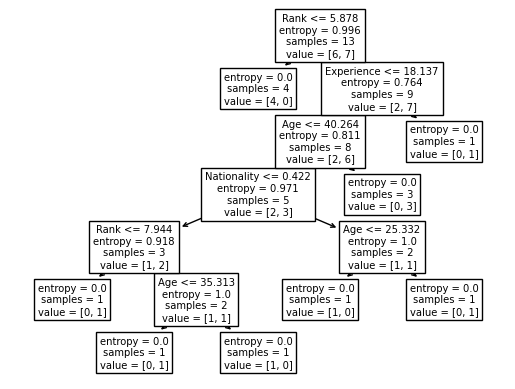

In [108]:
#exploring dtree with criterion entropy and splitter random
dtree = DecisionTreeClassifier(criterion='entropy',splitter='random')
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)

[Text(0.4, 0.9, 'Rank <= 6.5\nlog_loss = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'log_loss = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.7, 'Nationality <= 0.5\nlog_loss = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.5, 'Age <= 35.5\nlog_loss = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'log_loss = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Experience <= 9.5\nlog_loss = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'log_loss = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'log_loss = 0.0\nsamples = 4\nvalue = [0, 4]')]

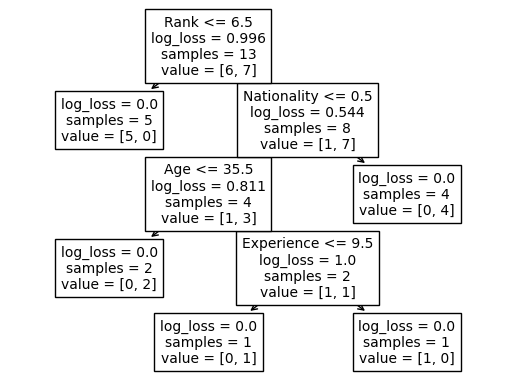

In [109]:
dtree = DecisionTreeClassifier(criterion='log_loss')
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)

[Text(0.4, 0.8333333333333334, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

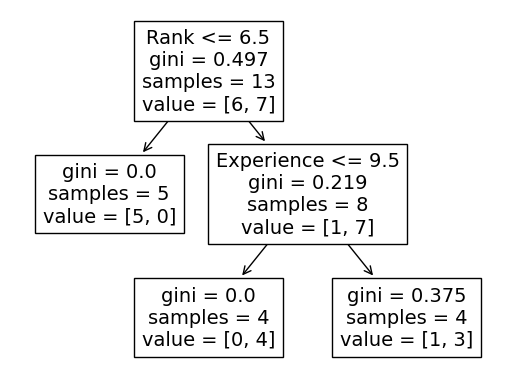

In [110]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=2)
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)

11. Check IRIS dataset with Entropy
12. Compare method we used in Excel and in Python for IRIS data


In [111]:
#pip install graphviz

In [112]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from graphviz import Source

In [113]:
# Load the dataset
iris = load_iris()

[Text(0.4, 0.8333333333333334, 'Width <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'Width <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

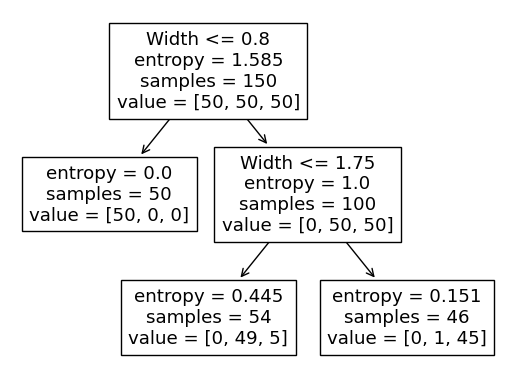

In [114]:

X = iris.data[:, 2:] # petal length and width
y = iris.target
features = ['Length', 'Width']

tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
tree_clf.fit(X, y)
tree.plot_tree(tree_clf, feature_names=features)
# Plot the decision tree graph
# export_graphviz(
# 	tree_clf,
# 	out_file="iris_tree.dot",
# 	feature_names=iris.feature_names[2:],
# 	class_names=iris.target_names,
# 	rounded=True,
# 	filled=True
# )

# with open("iris_tree.dot") as f:
# 	dot_graph = f.read()
	
# Source(dot_graph)

13.Identify advantages and disadvantages

**Advantages**
* It is easy to understand.
* Less requirement for data cleaning.

**Disadvantages**
* It is prone to overfitting.
* computational complexity increases with increase in class labels.

In [115]:
# Share some learnings


In [116]:

# 15 Decision Tree can be viewed using plottree and graphviz .. Explore both methods